In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import json
% matplotlib inline

In [2]:
# Importation des données
path='data/'
data_HR =  pd.read_csv(path+"HR_edges.csv",sep=',')
data_HU =  pd.read_csv(path+"HU_edges.csv",sep=",")
data_RO =  pd.read_csv(path+"RO_edges.csv",sep=",")
genre_HR = pd.read_csv(path+"HR_genres.csv",sep=",")
genre_HU = pd.read_csv(path+"HU_first_genre.csv",sep=",")
genre_RO = pd.read_csv(path+"RO_first_genre.csv",sep=",")
genres_parents = pd.read_csv(path+"genres_parents.csv",sep=',')

In [3]:
# On nettoie ci-dessous nos données
for k in range(len(genre_HU['genre'])):
    if genre_HU.iloc[k,1]=='R&amp;B':
        genre_HU.set_value(k,"genre",'R&B')
    if genre_HU.iloc[k,1]=='Spirituality &amp; Religion':
        genre_HU.set_value(k,"genre",'Spirituality & Religion')
    if genre_HU.iloc[k,1]=='Rock &amp; Roll/Rockabilly':
        genre_HU.set_value(k,"genre",'Rock & Roll/Rockabilly')
    if genre_HU.iloc[k,1]=='Singer &amp; Songwriter':
        genre_HU.set_value(k,"genre",'Singer & Songwriter')
    if genre_HU.iloc[k,1]=='Soul &amp; Funk':
        genre_HU.set_value(k,"genre",'Soul & Funk')
    if genre_HU.iloc[k,1]=='TV shows &amp; movies':
        genre_HU.set_value(k,"genre",'TV shows & movies')
    if genre_HU.iloc[k,1]=='Contemporary R&amp;B':
        genre_HU.set_value(k,"genre",'Contemporary R&B')
    if genre_HU.iloc[k,1]=='Oldschool R&amp;B':
        genre_HU.set_value(k,"genre",'Oldschool R&B')
for k in range(len(genre_RO['genre'])):    
    if genre_RO.iloc[k,1]=='R&amp;B':
        genre_RO.set_value(k,"genre",'R&B')
    if genre_RO.iloc[k,1]=='Spirituality &amp; Religion':
        genre_RO.set_value(k,"genre",'Spirituality & Religion')
    if genre_RO.iloc[k,1]=='Rock &amp; Roll/Rockabilly':
        genre_RO.set_value(k,"genre",'Rock & Roll/Rockabilly')
    if genre_RO.iloc[k,1]=='Singer &amp; Songwriter':
        genre_RO.set_value(k,"genre",'Singer & Songwriter')
    if genre_RO.iloc[k,1]=='Soul &amp; Funk':
        genre_RO.set_value(k,"genre",'Soul & Funk')
    if genre_RO.iloc[k,1]=='TV shows &amp; movies':
        genre_RO.set_value(k,"genre",'TV shows & movies')
    if genre_RO.iloc[k,1]=='Contemporary R&amp;B':
        genre_RO.set_value(k,"genre",'Contemporary R&B')
    if genre_RO.iloc[k,1]=='Oldschool R&amp;B':
        genre_RO.set_value(k,"genre",'Oldschool R&B')
    if genre_RO.iloc[k,1]=='Kids &amp; Family':
        genre_RO.set_value(k,"genre",'Kids & Family')


## Etude pour la Croatie

### Mise en place matrice Sparse : 

In [4]:
M_HR=np.zeros([max(data_HR["node_1"]+1),max(data_HR["node_1"])+1])
for k in range((len(data_HR))):
        M_HR[data_HR.iloc[k,0],data_HR.iloc[k,1]]=1

### Mise en place d'un dictionnaire des genres

In [5]:
dic_genre={}
for k in genre_HR["genre"].unique():
    dic_genre[k]=[]
for k in range(len(genre_HR)):
    dic_genre[genre_HR["genre"][k]].append(genre_HR["id"][k])

In [ ]:
# Proba de Style1/Style2 <=> Probabilité d'un lien avec le Style1 sachant qu'on est dans un cluster Style2

L=[]
#On créé une liste L des différents style
for k in dic_genre:
    L.append(k)
# On initialise à 0 notre matrice de Proba :
Prob_HR=np.zeros([len(L),len(L)])
# On parcoure chaque ligne de la matrice
for i in range(len(L)):
    print(i)
    for j in dic_genre[L[i]]:
        for k in range(len(L)):
            if sum(M_HR[j])!=0:
                Prob_HR[i,k]+=sum(M_HR[j,l] for l in dic_genre[L[k]])/sum(M_HR[j])
    Prob_HR[i]=Prob_HR[i]/sum(Prob_HR[i])

In [6]:
Prob_HR = np.loadtxt("Prob_HR.txt")
#Label = np.loadtxt("genre_ordre.txt")
L=['Dirty South','Asian Music','Ranchera','Bolero','West Coast','Alternative','Trance','Dance','Film Scores','Soundtracks','Metal','Opera','Folk','Jazz','Indian Music','Rap/Hip Hop','Rock','Baroque','Indie Rock','Reggae','Contemporary R&B','Comedy','TV shows & movies','Techno/House','Blues','African Music','Bluegrass','Old school soul','Indie Rock/Rock pop','TV Soundtracks','Pop','Dubstep','Brazilian Music','Instrumental jazz','Oldschool R&B','Latin Music','Singer & Songwriter','Country Blues','Films/Games','Electric Blues','Soul & Funk','Vocal jazz','Nursery Rhymes','Kids & Family','Country','Sports','Spirituality & Religion','R&B','Urban Cowboy','Hard Rock','Chill Out/Trip-Hop/Lounge','Classical','Tropical','Rock & Roll/Rockabilly','International Pop','Dancefloor','Disco','Indie Pop/Folk','Electro','Classical Period','Jazz Hip Hop','Modern','Indie Pop','Delta Blues','Kids','Contemporary Soul','Electro Hip Hop','Dancehall/Ragga']

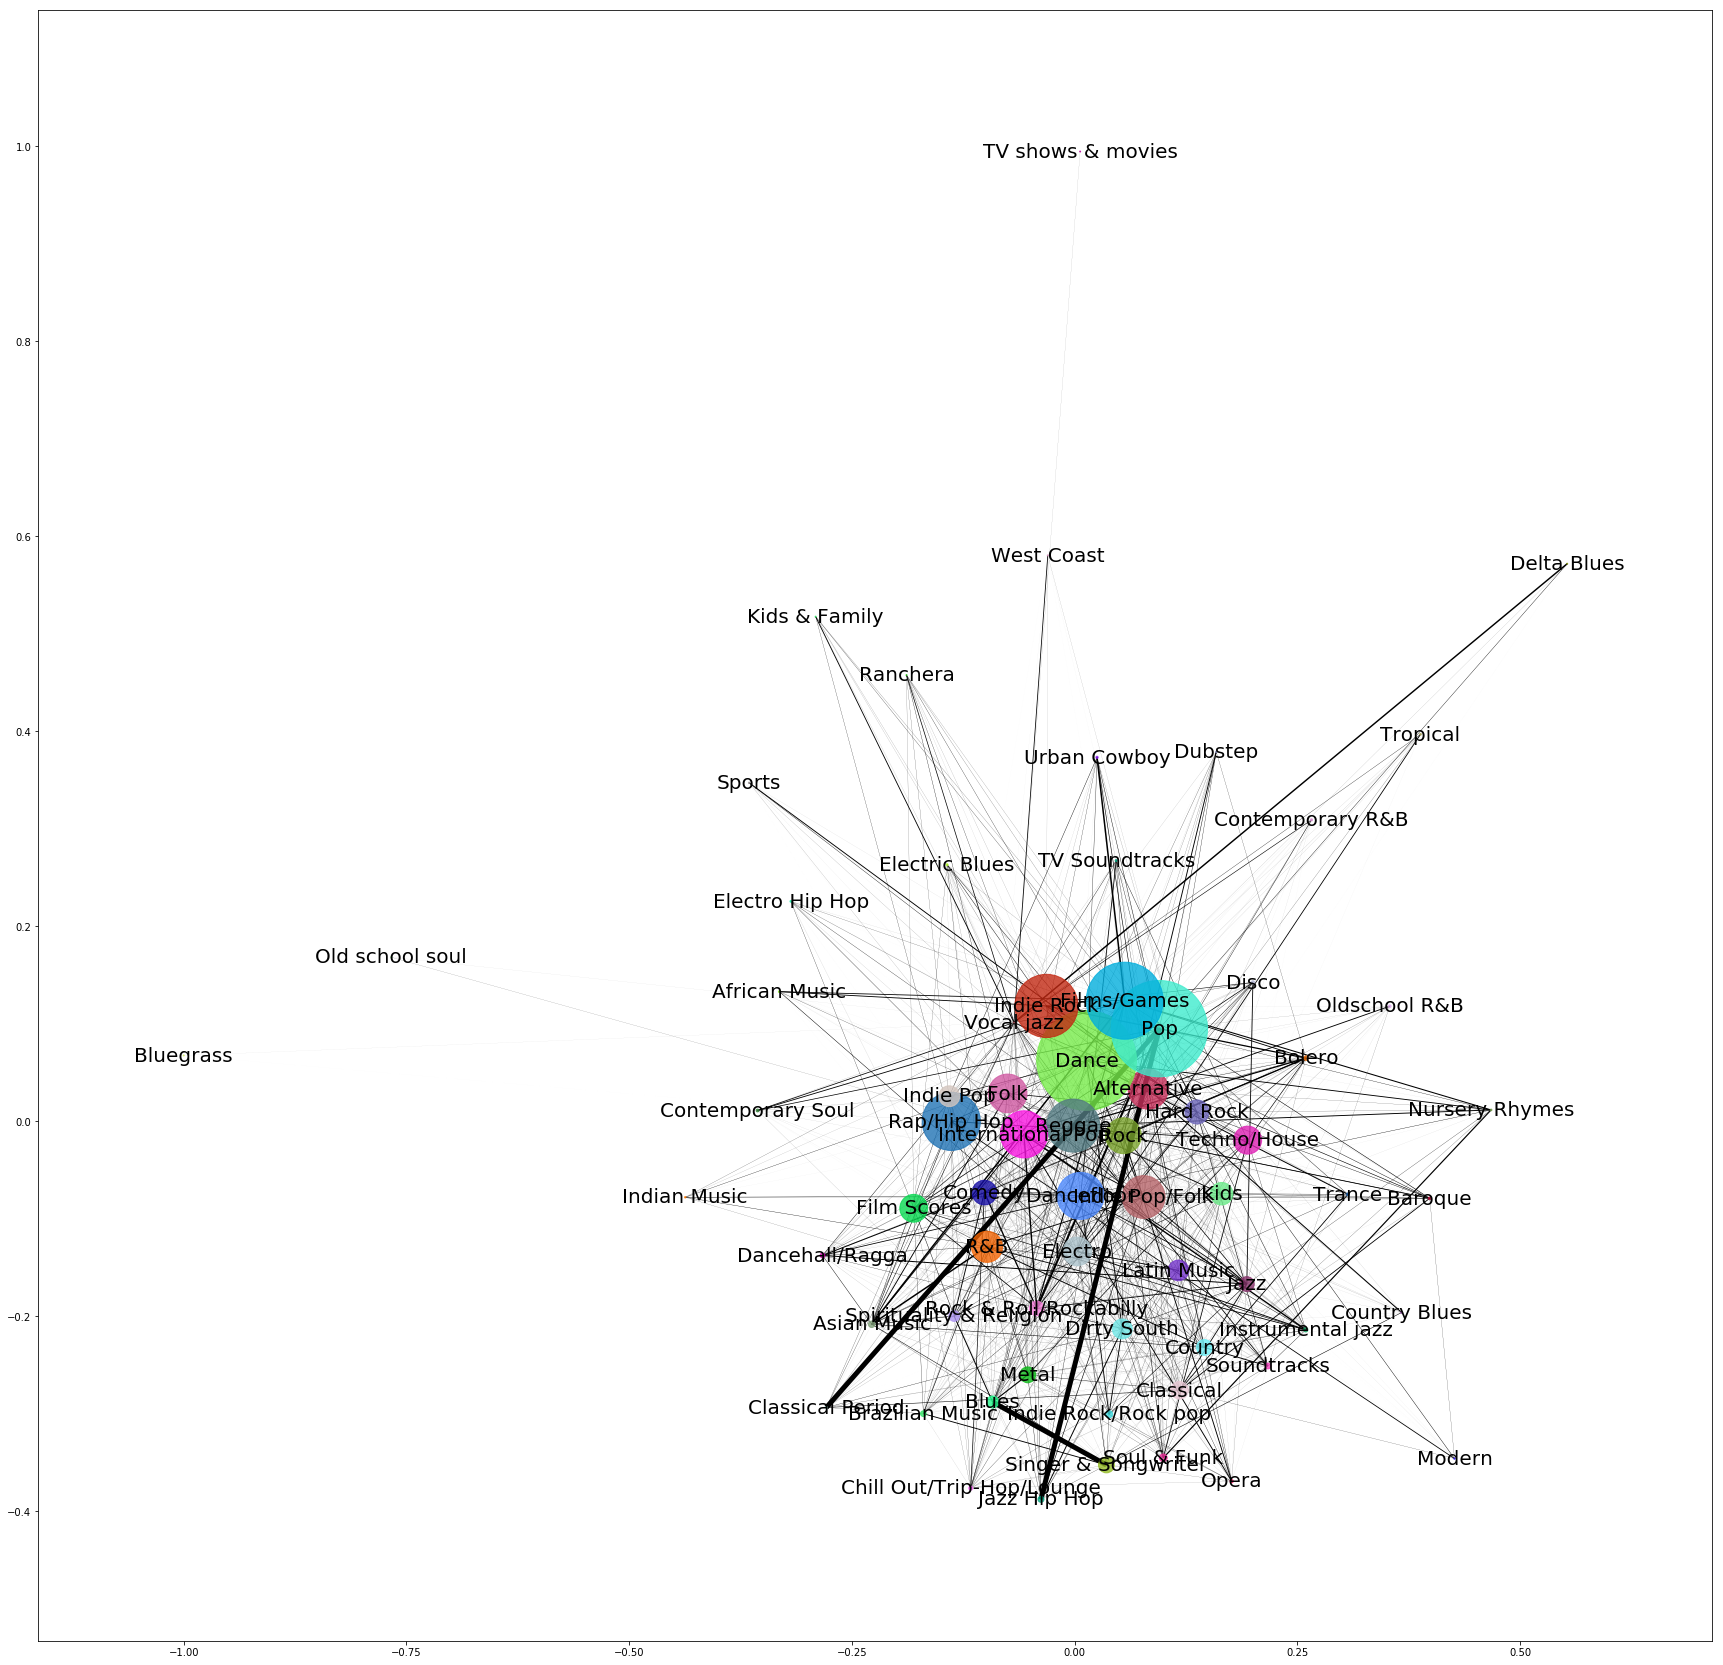

In [7]:
colors = []
for i in range(len(L)):
    colors.append('#'+'%06X' % random.randint(0, 0xFFFFFF))
G=nx.Graph()
G.add_nodes_from(range(len(L)))
list_edges=[]
dict_weight={}
labels={}
for row in range(len(Prob_HR)):
    labels[row]=L[row]
    for column in range(len(Prob_HR)):
        if Prob_HR[row][column]!=0:
            list_edges.append((row,column))
            dict_weight[(row,column)]=Prob_HR[row][column]
list_edges
dict_weight
G.add_edges_from(list_edges)
#pos=nx.fruchterman_reingold_layout(G) 
pos=nx.spring_layout(G)
#pos=nx.random_layout(G) 
#pos=nx.circular_layout(G)
#pos=nx.shell_layout(G)
#pos=nx.spectral_layout(G)
node_size=[]
edge_width=[]
for style in L:
    node_size.append(len(dic_genre[style]))
for edge in list_edges:
    edge_width.append(5*Prob_HR[edge[0]][edge[1]])
    


plt.figure(figsize=(30,30))
nx.draw_networkx_nodes(G,pos,node_color=colors,node_size=node_size,alpha=0.8,label=L)
nx.draw_networkx_edges(G,pos,width=edge_width)
nx.draw_networkx_labels(G,pos,font_size=20,labels=labels)
plt.show()

In [ ]:
# On stocke ci-dessous dans un dictionnaire certaines statistiques associés à la distribution en degrés des users
# de chaque cluster
degree_dic={}
degree_stat_dic={}
for j in list(dic_genre.keys()):
    degree_list=[]
    degree_stat=[]
    for k in dic_genre[j]:
        degree_list.append(G_users.degree(k))
    degree_dic[j]=degree_list
    degree_stat.append(np.mean(degree_list))
    degree_stat.append(np.median(degree_list))
    degree_stat.append(np.std(degree_list))
    degree_stat_dic[j]=degree_stat
degree_dic
degree_stat_dic

## Etude pour la Hongrie

In [8]:
M_HU=np.zeros([max(data_HU["node_2"]+1),max(data_HU["node_2"])+1])
for k in range((max(data_HU["node_2"]))):
        M_HU[data_HU.iloc[k,0],data_HU.iloc[k,1]]=1

In [12]:
# Mise en place d'un dictionnaire de style
dic_genre_HU={}
for k in genre_HU["genre"].unique():
    dic_genre_HU[k]=[]
for k in range(len(genre_HU)):
    dic_genre_HU[genre_HU["genre"][k]].append(genre_HU["id"][k])

In [ ]:
LHU=[]
#On créé une liste L des différents style
for k in dic_genre_HU:
    LHU.append(k)
# On initialise à 0 notre matrice de Proba :
Prob_HU=np.zeros([len(LHU),len(LHU)])
# On parcoure chaque ligne de la matrice
for i in range(len(LHU)):
    print(i)
    for j in dic_genre_HU[LHU[i]]:
        for k in range(len(LHU)):
            if sum(M_HU[j])!=0:
                Prob_HU[i,k]+=sum(M_HU[j,l] for l in dic_genre_HU[LHU[k]])/sum(M_HU[j])
    if sum(Prob_HU[i])!=0: # Ce cas apparaît quand dans un style personne n'a d'amis
        Prob_HU[i]=Prob_HU[i]/sum(Prob_HU[i])

In [9]:
#np.savetxt('Prob_HU.txt', Prob_HU)
LHU=['Pop','Jazz','Singer & Songwriter','Oldschool R&B','Dancehall/Ragga','Baroque','East Coast','R&B','Grime','Reggae','Asian Music','Instrumental jazz','TV shows & movies','Contemporary Soul','Latin Music','Dance','Metal','Country','Films/Games','Comedy','African Music','Kids','Brazilian Music','Sports','Contemporary R&B','Trance','Old school soul','Dubstep','Folk','Indie Pop/Folk','Hard Rock','Soundtracks','Disco','Nursery Rhymes','Film Scores','Rock & Roll/Rockabilly','Soul & Funk','Classical','Electro','Tropical','TV Soundtracks','Chill Out/Trip-Hop/Lounge','International Pop','Indie Pop','Blues','Alternative Country','Indian Music','Indie Rock','Opera','Rap/Hip Hop','Rock','Urban Cowboy','Electric Blues','Dancefloor','Jazz Hip Hop','Indie Rock/Rock pop','Classical Period','Dirty South','Bolero','Spirituality & Religion','Country Blues','Alternative','Techno/House']
Prob_HU = np.loadtxt("Prob_HU.txt")

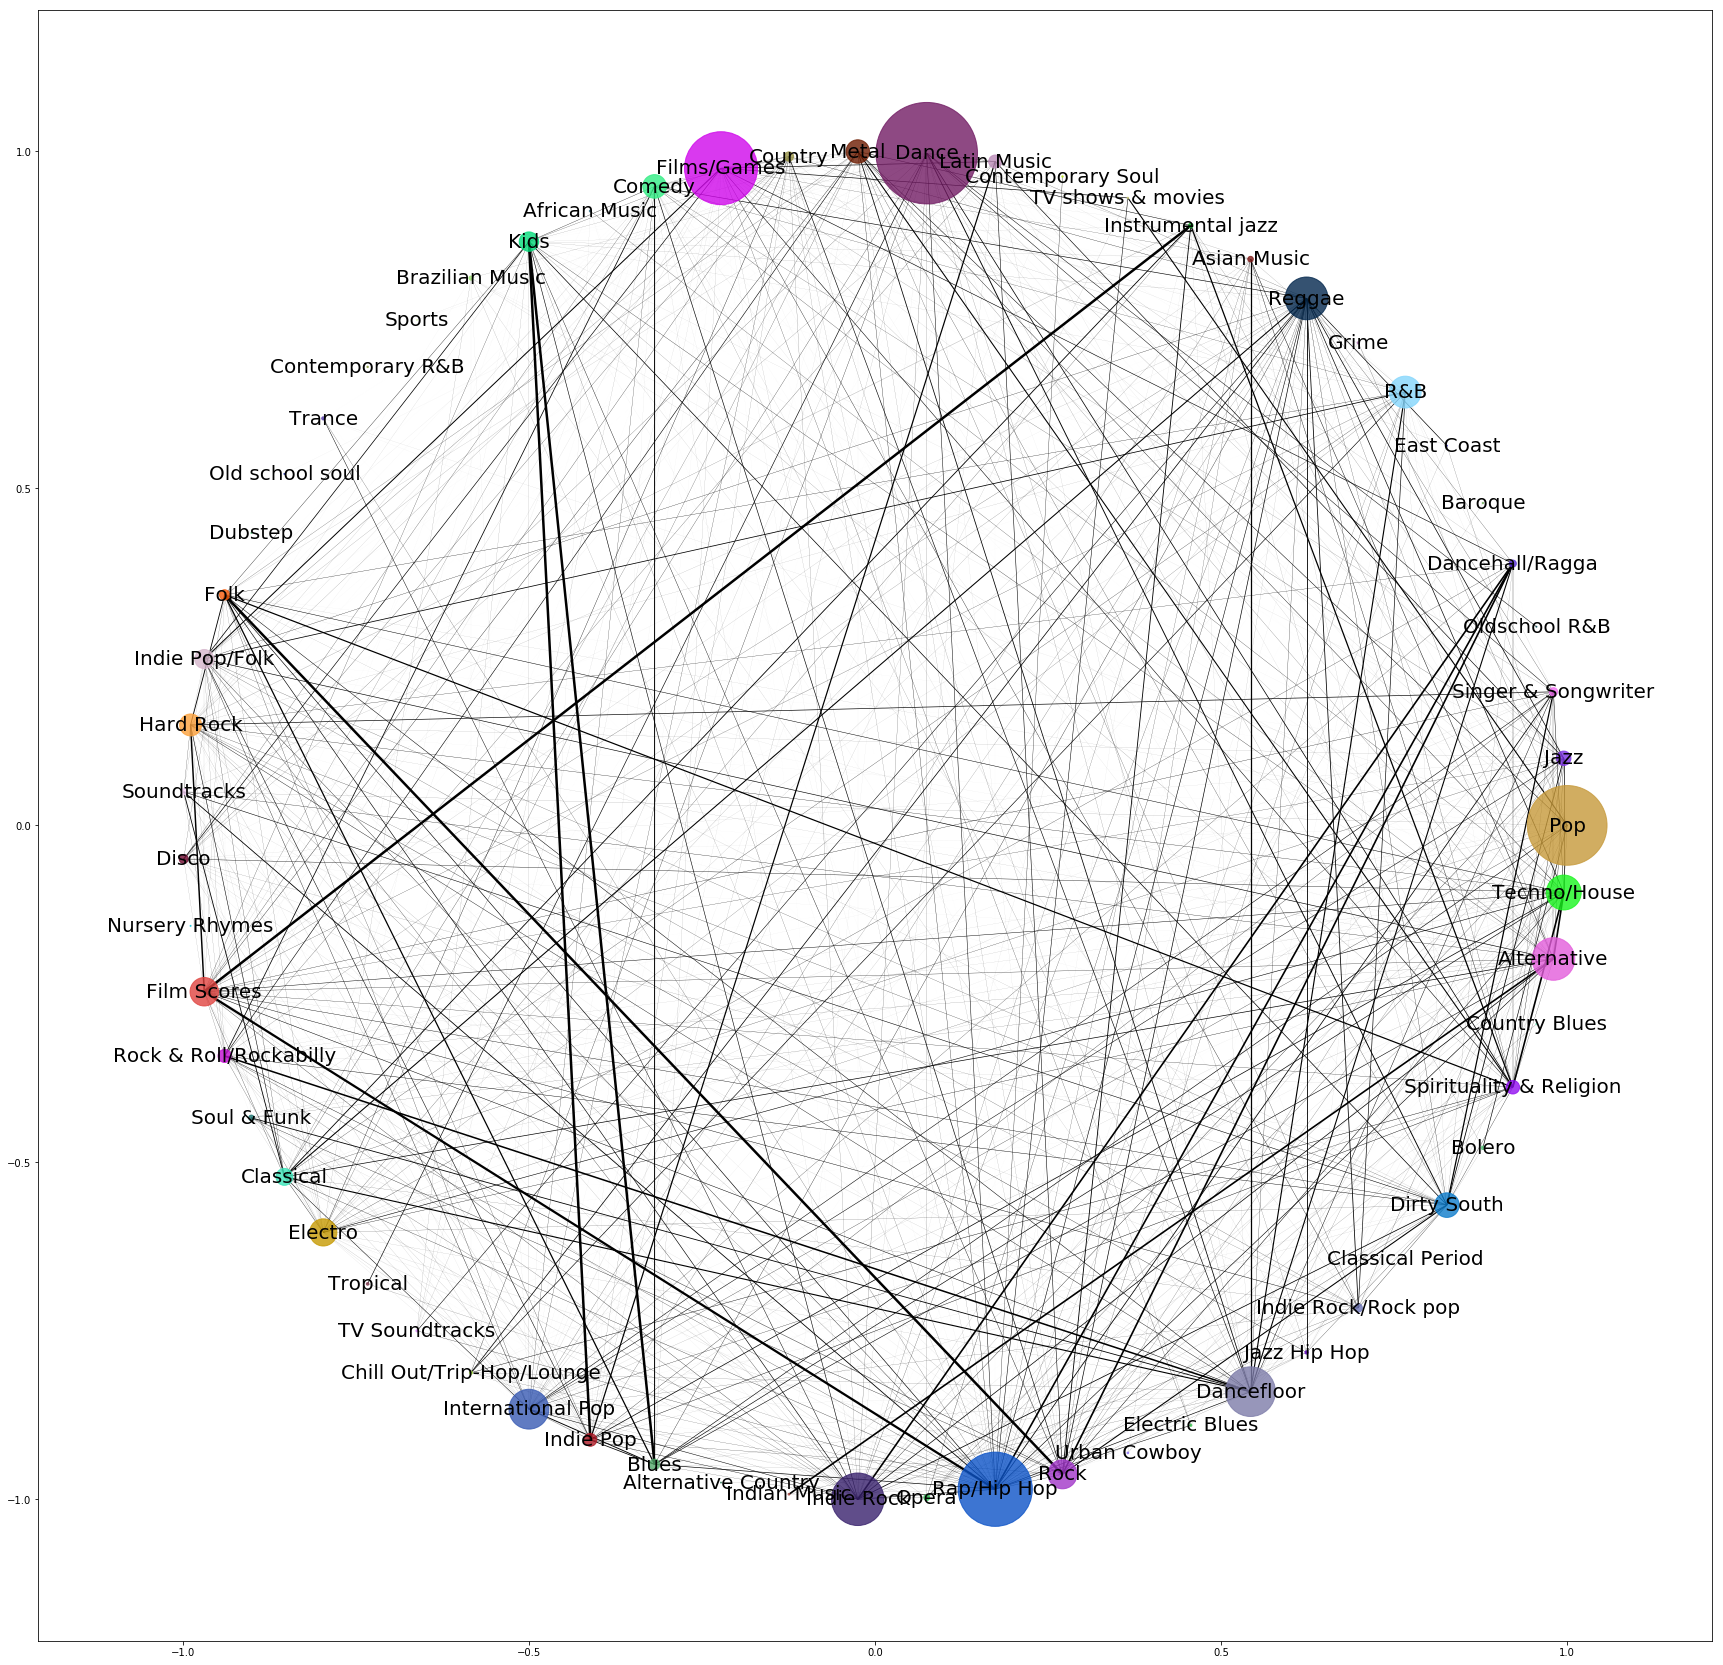

In [13]:
colors = []
for i in range(len(LHU)):
    colors.append('#'+'%06X' % random.randint(0, 0xFFFFFF))
GHU=nx.Graph()
GHU.add_nodes_from(range(len(LHU)))
list_edges=[]
dict_weight={}
labels={}
for row in range(len(Prob_HU)):
    labels[row]=LHU[row]
    for column in range(len(Prob_HU)):
        if Prob_HU[row][column]!=0:
            list_edges.append((row,column))
            dict_weight[(row,column)]=Prob_HU[row][column]

GHU.add_edges_from(list_edges)
#pos=nx.fruchterman_reingold_layout(GHU)
pos=nx.circular_layout(GHU)
#pos=nx.spring_layout(GHU)
#pos=nx.random_layout(GHU) 
node_size=[]
edge_width=[]
for style in LHU:
    node_size.append(len(dic_genre_HU[style]))
for edge in list_edges:
    edge_width.append(5*Prob_HU[edge[0]][edge[1]])
    


plt.figure(figsize=(30,30))
nx.draw_networkx_nodes(GHU,pos,node_color=colors,node_size=node_size,alpha=0.8,label=LHU)
nx.draw_networkx_edges(GHU,pos,width=edge_width)
nx.draw_networkx_labels(GHU,pos,font_size=20,labels=labels)
plt.show()

## Etude pour la Roumanie

In [14]:
M_RO=np.zeros([max(data_RO["node_2"]+1),max(data_RO["node_2"])+1])
for k in range((max(data_RO["node_2"]))):
        M_RO[data_RO.iloc[k,0],data_RO.iloc[k,1]]=1

In [15]:
dic_genre_RO={}
for k in genre_RO["genre"].unique():
    dic_genre_RO[k]=[]
for k in range(len(genre_RO)):
    dic_genre_RO[genre_RO["genre"][k]].append(genre_RO["id"][k])

In [ ]:
LRO=[]
#On créé une liste L des différents style
for k in dic_genre_RO:
    LRO.append(k)
# On initialise à 0 notre matrice de Proba :
Prob_RO=np.zeros([len(LRO),len(LRO)])
# On parcoure chaque ligne de la matrice
for i in range(len(LRO)):
    print(i)
    for j in dic_genre_RO[LRO[i]]:
        for k in range(len(LRO)):
            if sum(M_RO[j])!=0:
                Prob_RO[i,k]+=sum(M_RO[j,l] for l in dic_genre_RO[LRO[k]])/sum(M_RO[j])
    if sum(Prob_RO[i])!=0:
        Prob_RO[i]=Prob_RO[i]/sum(Prob_RO[i])

In [16]:
#np.savetxt('Prob_RO.txt', Prob_RO)
Prob_RO = np.loadtxt("Prob_RO.txt")
LRO=['Electro','Indie Pop','Trance','African Music','Alternative','Spirituality & Religion','Baroque','Pop','Dirty South','Tropical','Classical','Soundtracks','Jazz Hip Hop','Kids','Country Blues','East Coast','R&B','Film Scores','Brazilian Music','Chicago Blues','Techno/House','Folk','Soul & Funk','Singer & Songwriter','Rock','Reggae','Urban Cowboy','Nursery Rhymes','Dubstep','Blues','Metal','Hard Rock','Contemporary Soul','Jazz','Indie Rock/Rock pop','Films/Games','Classical Period','Comedy','Instrumental jazz','Rock & Roll/Rockabilly','Chill Out/Trip-Hop/Lounge','Indie Rock','International Pop','Opera','Musicals','Alternative Country','Indie Pop/Folk','Dancehall/Ragga','Indian Music','Kids & Family','Grime','Asian Music','Latin Music','Oldschool R&B','Sports','Modern','Disco','Country','Vocal jazz','Electric Blues','Contemporary R&B','Dance','TV Soundtracks','Rap/Hip Hop','Dancefloor','Bluegrass','Electro Hip Hop','Bolero']

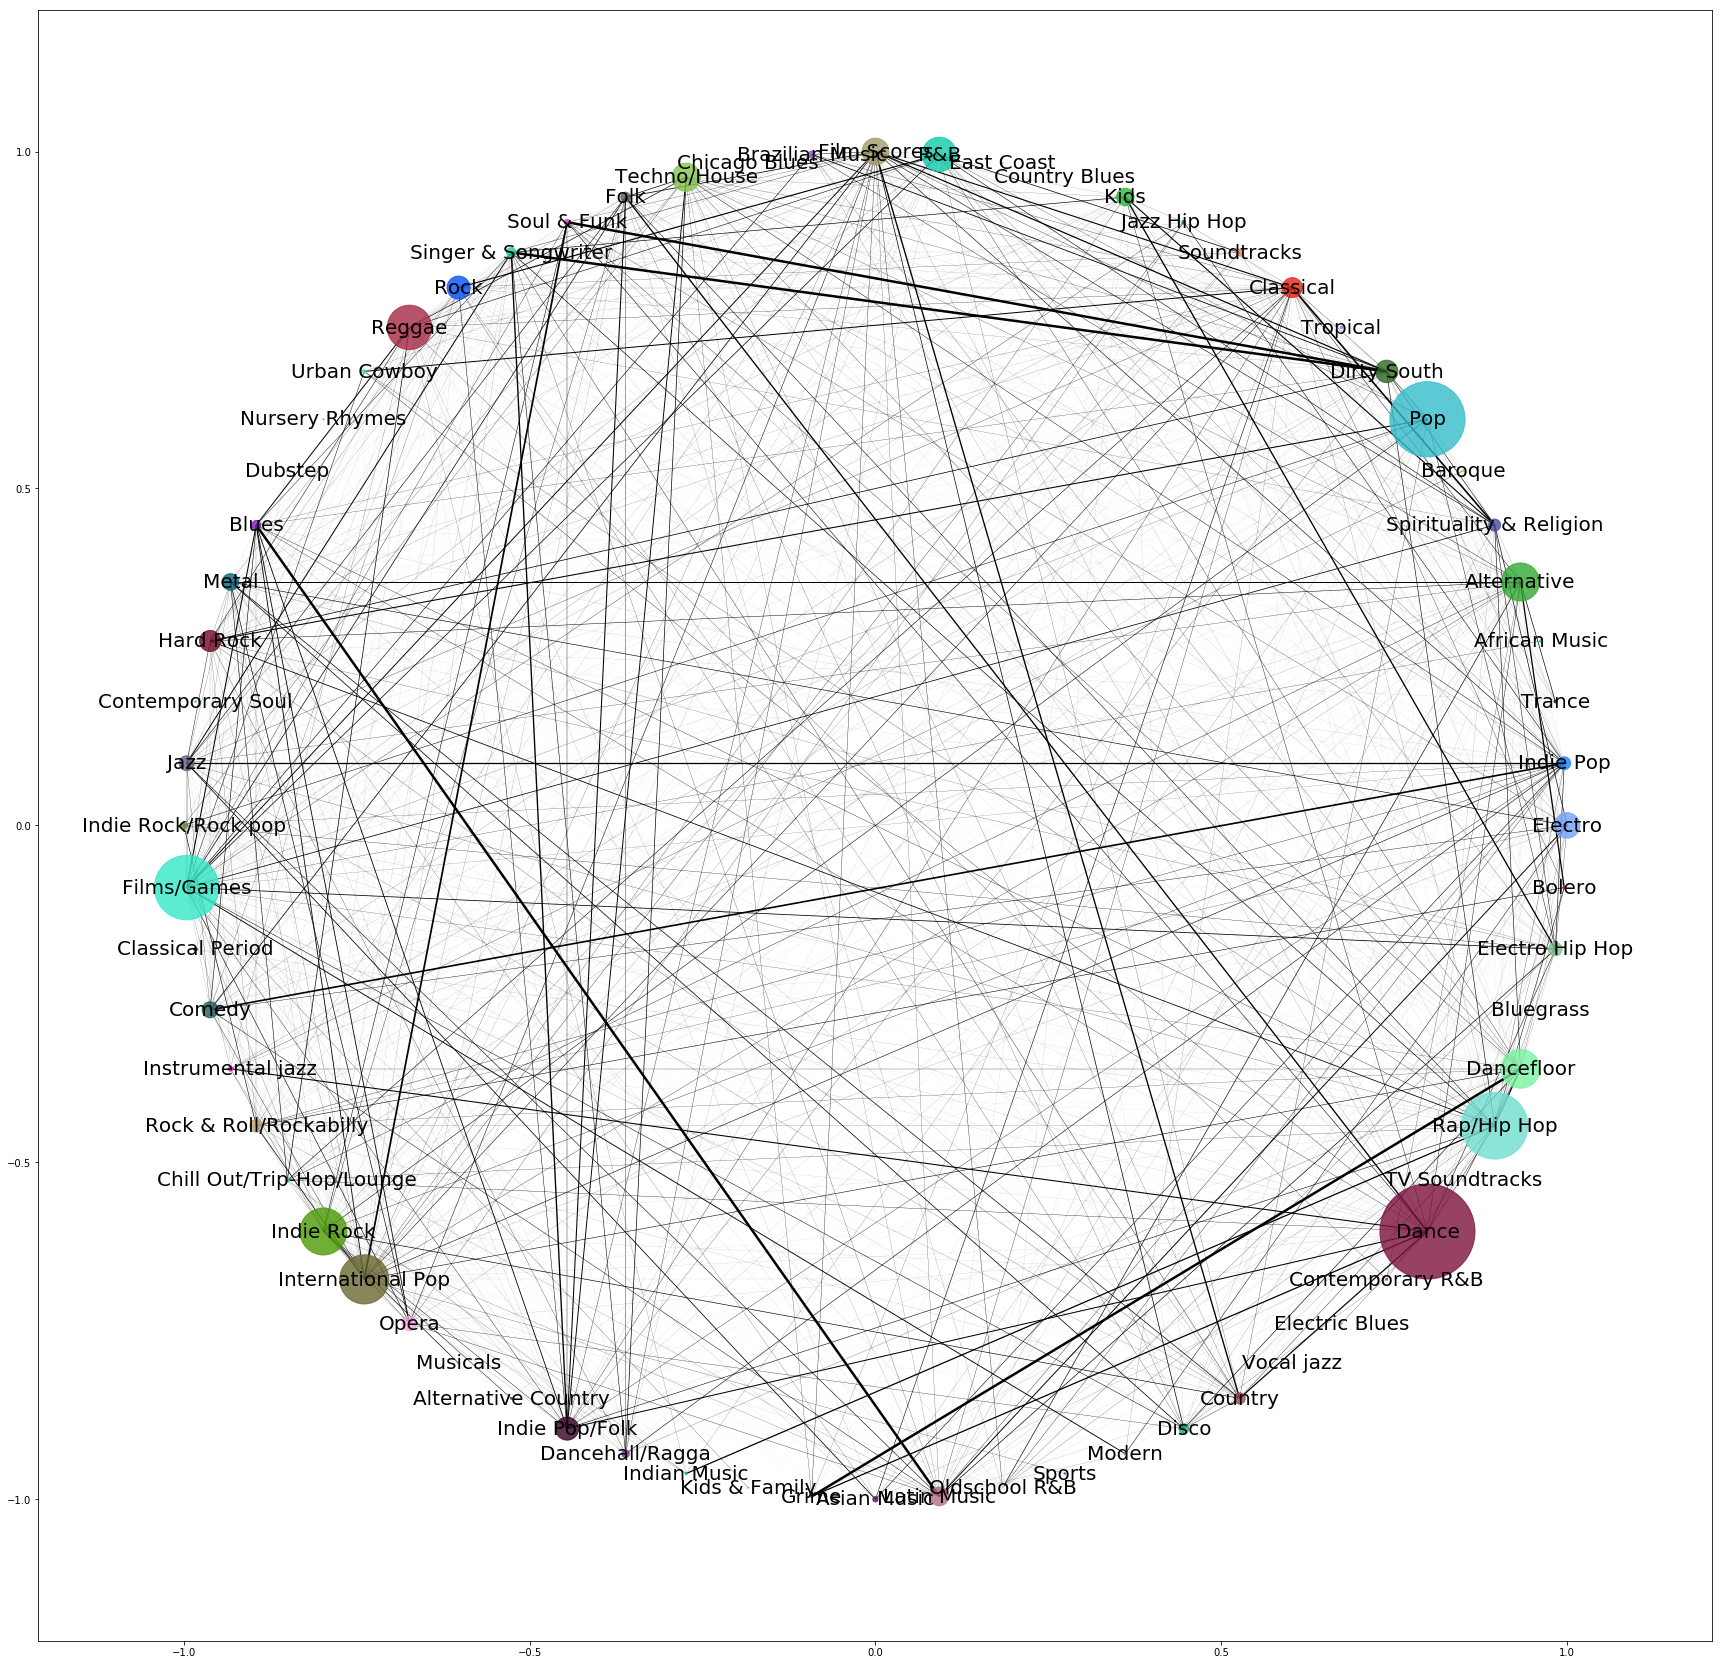

In [18]:
colors = []
for i in range(len(LRO)):
    colors.append('#'+'%06X' % random.randint(0, 0xFFFFFF))
GRO=nx.Graph()
GRO.add_nodes_from(range(len(LRO)))
list_edges=[]
dict_weight={}
labels={}
for row in range(len(Prob_RO)):
    labels[row]=LRO[row]
    for column in range(len(Prob_RO)):
        if Prob_RO[row][column]!=0:
            list_edges.append((row,column))
            dict_weight[(row,column)]=Prob_RO[row][column]

GRO.add_edges_from(list_edges)
#pos=nx.fruchterman_reingold_layout(GRO) 
#pos=nx.random_layout(GRO) 
#pos=nx.spring_layout(GRO) 
pos=nx.circular_layout(GRO) 
node_size=[]
edge_width=[]
for style in LRO:
    node_size.append(len(dic_genre_RO[style]))
for edge in list_edges:
    edge_width.append(5*Prob_RO[edge[0]][edge[1]])
    


plt.figure(figsize=(30,30))
nx.draw_networkx_nodes(GRO,pos,node_color=colors,node_size=node_size,alpha=0.8,label=LRO)
nx.draw_networkx_edges(GRO,pos,width=edge_width)
nx.draw_networkx_labels(GRO,pos,font_size=20,labels=labels)
plt.show()